# <font color="Blue">Predicting Material Backorders in Inventory Management System using Machine Learning</font>

## Business Problem:
<b>When the demand increases and it becomes a tough job to maintain proper demand
and supply ratio, predicting the backorders becomes an important component and
necessity for the supply chain companies or any product based companies. As well
as more backorders will lead a large number of customers to look out for other
options and get the product from the competitors.</b>

## Machine Learning formulation of business problem
<b>The concept of backorders was highly unacceptable by the customer as well as it
affected the Transportation system, Production system and overall Management of
the Product. Therefore, a proper prediction mechanism was needed to forecast the
amount of order that could come. We can make use of historical datas of the
product from the Inventory management system and make a model that could
predict the Backorders.</b>

## Business constraints
● <b>Random demand may arise, which has no past history in the dataset.

● Prediction of a product for a day should be of minimum delay of 1 or 2 days</b>

## Performance Metric
<b><ul><li>We will be using F1 score as primary metric with micro average as this averaging scheme is not prone to inaccurate values due to an unequally distributed test set </li>
<li>Secondly, we will also see the AUC-ROC score</li></ul></b>
    
## Base Model
<b> DummyClassifier is used with strategy parameter to compare the result with all the other classifier</b>




In [2]:
!pip install pandas-profiling

  Using cached https://files.pythonhosted.org/packages/2b/de/6e4dd6d720c49939544352155dc06a08c9f7e4271aa631a559dfbeaaf9d4/missingno-0.4.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b3/e7/fcd59e12169de19f0131ff2812077f964c6b960e7c09804d30a7bf2ab461/htmlmin-0.1.12.tar.gz
  Using cached https://files.pythonhosted.org/packages/30/d0/8699372d1c22202e80b160527f8412d98a5edfefeefac056df3997e84801/PyYAML-5.4.1-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/b7/ce/193e8ddf62d4be643b9b4b20e8e9c63b2f6a20f92778c0410c629f89bdaa/phik-0.11.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/f3/b7/c7f488101c0bb5e4178f3cde416004280fd40262433496830de8a8c21613/networkx-2.5.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8e/18/9dbb772b5ef73a3069c66bb5bf29b9fb4dd57af0d5790c781c3f559bcca6/ImageHash-4.2.0-py2.py3-none-any.whl
  Running setup.py bdist_wheel for htmlmin: started
  Running setup.py bdist_wheel for 

distributed 1.21.8 requires msgpack, which is not installed.
matplotlib 3.3.4 has requirement pillow>=6.2.0, but you'll have pillow 5.1.0 which is incompatible.
cryptography 3.3.1 has requirement cffi>=1.12, but you'll have cffi 1.11.5 which is incompatible.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\pallc\\AppData\\Local\\Temp\\pip-uninstall-0ocx4m7t\\users\\pallc\\anaconda3\\lib\\site-packages\\markupsafe\\_speedups.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You are using pip version 10.0.1, however version 21.1.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 160kB/s 


In [1]:
import tensorflow as tf

tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from tensorflow.python.client import device_lib 
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6575791522359563755, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14509932544
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17366141748320034972
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [4]:
!gdown --id 1P_RJlKfcyhaWtvYrcXRGGGnnwCI14XFt
!gdown --id 1c8C4VxYLOzGlVMUvbL0YWMKu7gSJCh31

Downloading...
From: https://drive.google.com/uc?id=1P_RJlKfcyhaWtvYrcXRGGGnnwCI14XFt
To: /content/Kaggle_Training_Dataset_v2.csv
123MB [00:02, 56.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1c8C4VxYLOzGlVMUvbL0YWMKu7gSJCh31
To: /content/Kaggle_Test_Dataset_v2.csv
17.6MB [00:00, 81.9MB/s]


**IMPORTING LIBRARIES**

In [11]:
import pandas as pd
import numpy as np
import warnings
from pandas_profiling import ProfileReport
from IPython.display import IFrame
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_curve, auc
from tqdm import tqdm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.calibration import CalibratedClassifierCV
import tqdm as tq
from sklearn.svm import SVC
import lightgbm as lgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
warnings.filterwarnings("ignore")


In [12]:
test_df=pd.read_csv("Kaggle_Test_Dataset_v2.csv")
train_df=pd.read_csv("Kaggle_Training_Dataset_v2.csv")

## EXPLORATORY DATA ANALYSIS

In [ ]:

train_df.dtypes

sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

>>#### <font color='Green'>There are 23 columns with 15 Numerical features with data type float and 8 categorical features</font>

In [13]:
percent_missing = train_df.isnull().sum() * 100 / len(train_df)                
missing_df = pd.DataFrame({'percent_missing': percent_missing})          

missing_df

,percent_missing
sku,0.000000
national_inv,0.000059
lead_time,5.977625
in_transit_qty,0.000059
forecast_3_month,0.000059
forecast_6_month,0.000059
forecast_9_month,0.000059
sales_1_month,0.000059
sales_3_month,0.000059
sales_6_month,0.000059


>>#### <font color='Green'>lead_time shows missing value of 5 % of missing values and rest feature has same amount of very less missing value</font>

In [ ]:
len(train_df)

1687861

>>#### <font color='Green'>train dataset has 167861 rows</font>

In [ ]:
train_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


>>#### <font color='Green'>-The SKU is the primary key which is of no use in the backorder prediction, so we need to drop this column.</font>
>><font color='Green'>-There are Null values in lead_time and perf_6_month_avg,perf_12_month_avg has negative value -99 which is needed to be fixed.</font>

In [ ]:
train_df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>>#### <font color="Green">The Last row consists Nan for every column which is of no use and should be removed</font>

In [ ]:
test_df=pd.read_csv("Kaggle_Test_Dataset_v2.csv")
test_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No


In [ ]:
len(test_df)

242076

>>#### <font color="Green">The test dataset has same number columns as train dataset with 242076 </font>

>### Summarization of categorical feature

In [ ]:
train_df.describe(include=['O'])

,sku,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1687861,1687860,1687860,1687860,1687860,1687860,1687860,1687860
unique,1687861,2,2,2,2,2,2,2
top,3281184,No,No,No,No,Yes,No,No
freq,1,1686953,1300377,1687615,1484026,1626774,1687129,1676567


>>#### <font color="Green">Categorical features has two categories 'yes' and 'No' which is needed to be represented as numbers(prefrerrably 1 and 0) before fitting into the model</font>

>### Summarization of Numerical feature

In [ ]:
train_df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


>>#### <font color='Green'>-We can see that the difference between the 75th percentile value and max value is huge. This indicates presence of outlier.</font>
>><font color="Green">-In perf_6_month_avg and perf_12_month_avg columns, it is observed tht the lowest value is -0.99 which is needed to be replaced.</font>

>### Now, we will see a brief report generated through Pandas profiling

In [ ]:
prof = ProfileReport(train_df)
prof.to_file(output_file='output.html')#analysis report stored in output.html 

In [8]:
from IPython.display import IFrame

IFrame(src='./output.html', width=900, height=1000)

#### <font color="Green">Pandas profiling has shown that 
<font color="Green">-forecast_3_month is highly correlated with forecast_6_month<br>
<font color="Green">-forecast_6_month is highly correlated with forecast_3_month <br>
<font color="Green">-forecast_9_month is highly correlated with forecast_3_month<br>
<font color="Green">-sales_1_month is highly correlated with sales_3_month<br>
<font color="Green">-sales_3_month is highly correlated with sales_1_month <br>
<font color="Green">-sales_6_month is highly correlated with sales_3_month<br>
<font color="Green">-sales_9_month is highly correlated with sales_3_month <br>
<font color="Green">-perf_6_month_avg is highly correlated with perf_12_month_avg<br>
<font color="Green">-perf_12_month_avg is highly correlated with perf_6_month_avg<br>

<font color="Green">-As many feature are highly correlated, we cannot use various linear models as change in the separating 
plane's coefficeint and in some cases variance of weight becomes high.
Therefore, we need to remove certain features.We can can either use PCA or simply remove</font>


Text(0.5,1,'Correlation between different fearures')

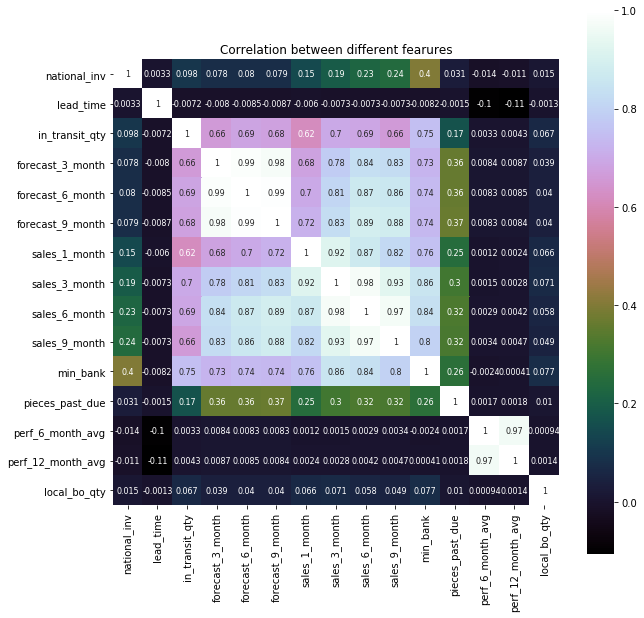

In [ ]:
#Reference:https://seaborn.pydata.org/generated/seaborn.heatmap.html
correlation = train_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,annot_kws={'size': 8},cmap='cubehelix')

plt.title('Correlation between different fearures')

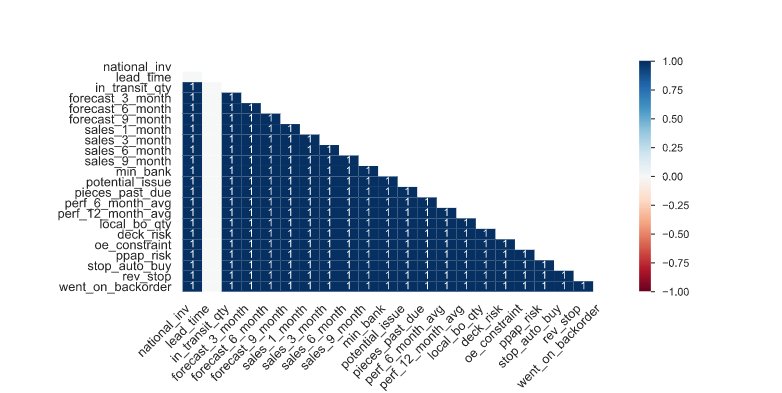

>>#### <font color="Green">-Here, we can observe the in_transit_qty is highly correlated with sales,min_bank and forecast as<br> <font color="Green"><font color="Green">earlier, we have seen sales and forecast are highly correlated.<br>
>><font color="Green">Now, when sales becomes high, the transport cost also goes high. <br>
>><font color="Green">-Min_bank is highly corelated with sales and forecast as stock is highly related to sales and forecast.</font>

### Plotting on Numerical feature

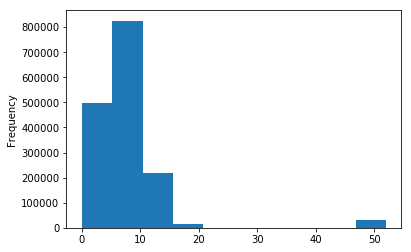

In [ ]:
train_df.lead_time.plot.hist()

>>#### <font color="Green">-Plotting of lead_time is done on x-axis and their frequency on y-axis.</font>
>><font color="Green">-Most of the lead time comes between 0 to 20 . so the missing values in lead time can be taken as median of the feature or removed completly</font>

>### Sales and went_on_Backorder ploting

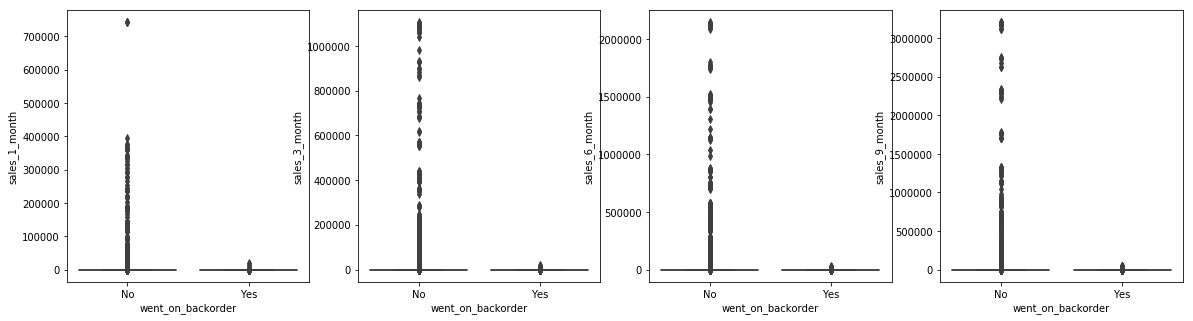

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

sales=['sales_1_month','sales_3_month','sales_6_month','sales_9_month']
     
plt.subplots(figsize=(20, 5))     
plt.subplot(1, 4, 1)     
ax=sns.boxplot(x='went_on_backorder', y=sales[0], data=train_df)
plt.subplot(1, 4, 2)  
ax=sns.boxplot(x='went_on_backorder', y=sales[1], data=train_df)
plt.subplot(1, 4, 3)
ax=sns.boxplot(x='went_on_backorder', y=sales[2], data=train_df)
plt.subplot(1, 4, 4)
ax=sns.boxplot(x='went_on_backorder', y=sales[3], data=train_df)
plt.show()

>>#### <font color="Green">Boxplot is clearly showing us, that backorder happened when sales was low.Infact it shows that among all other feature,sales is very important to predict backorders. </font>

>### Forecast and went_on_backorder plotting

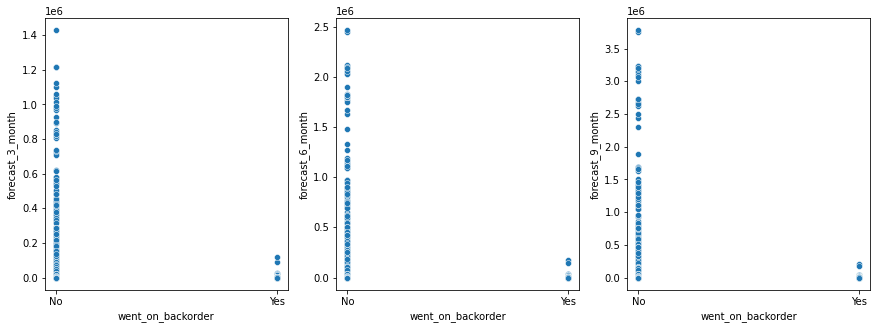

In [ ]:
forecast=['forecast_3_month','forecast_6_month','forecast_9_month']
plt.subplots(figsize=(20, 5))     
plt.subplot(1, 4, 1)     
ax=sns.scatterplot(x='went_on_backorder', y=forecast[0], data=train_df)
plt.subplot(1, 4, 2)  
ax=sns.scatterplot(x='went_on_backorder', y=forecast[1], data=train_df)
plt.subplot(1, 4, 3)
ax=sns.scatterplot(x='went_on_backorder', y=forecast[2], data=train_df)

plt.show()

>>#### <font color="Green">Backorder only happened when the forecast is below 0.5 for all the three features</font>

>### Sales and forecast plotting

In [ ]:
import matplotlib.pyplot as plt
 
no = train_df[train_df['went_on_backorder']=='No']#dataframe with not backorders
yes = train_df[train_df['went_on_backorder']=='Yes']# dataframe with backorders



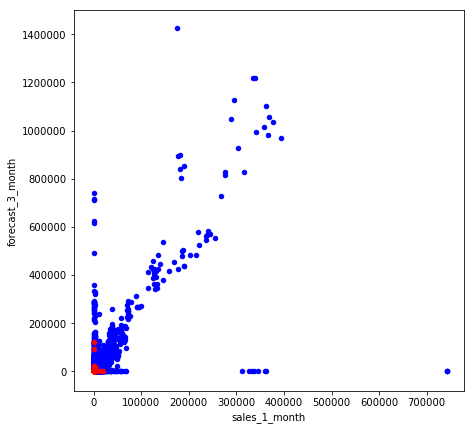

In [ ]:

fig = plt.figure(figsize=(7, 7))
ax = fig.gca()
no.plot(kind='scatter', x='sales_1_month', y='forecast_3_month', ax=ax, color='Blue', legend=True)
yes.plot(kind='scatter', x='sales_1_month', y='forecast_3_month', ax=ax, color='Red')

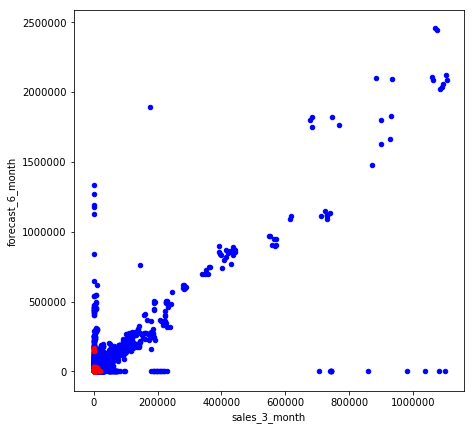

In [ ]:

fig1 = plt.figure(figsize=(7, 7))
ax1 = fig1.gca()
no.plot(kind='scatter', x='sales_3_month', y='forecast_6_month', ax=ax1, color='Blue', legend=True)
yes.plot(kind='scatter', x='sales_3_month', y='forecast_6_month', ax=ax1, color='Red')

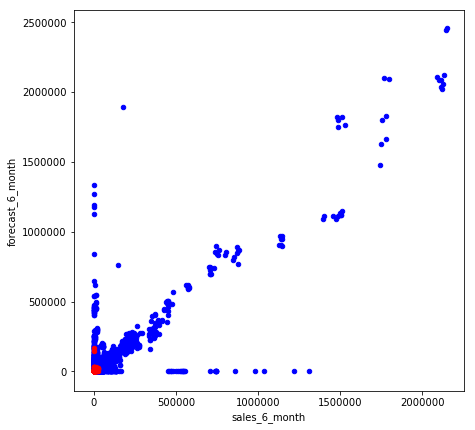

In [ ]:
fig2 = plt.figure(figsize=(7, 7))
ax2 = fig2.gca()
no.plot(kind='scatter', x='sales_6_month', y='forecast_6_month', ax=ax2 ,color='Blue', legend=True)

yes.plot(kind='scatter', x='sales_6_month', y='forecast_6_month', ax=ax2  ,color='Red')

>>#### <font color="Green"> By seeing this plot, we can observe the red points which denotes backorders are more between sales below 5000 and forecast below 25000 which is overall very low</font>

>### Performance of 6 and 9 month plotting

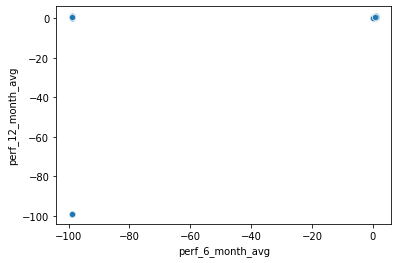

In [ ]:
performance=['perf_6_month_avg','perf_12_month_avg']

 
ax=sns.scatterplot(x=performance[0], y=performance[1], data=train_df)


plt.show()

>>#### <font color="green">No matter what the performance value is, it doesnot make any difference, we can see the overlapping point on the graph and the backorders persist. So we can take any one performance feature. we will take 6 month Performance</font>

>### Bar plot to showcase categorical features with respect to backorder

potential_issue         No  Yes
went_on_backorder              
No                 1675711  856
Yes                  11242   51


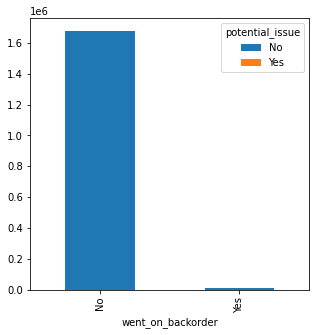

In [ ]:
#Reference:https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/
potential = pd.crosstab(index=train_df["went_on_backorder"], 
                          columns=train_df["potential_issue"])
print(potential)
potential.plot(kind="bar", figsize=(5,5),
                 stacked=True)

deck_risk               No     Yes
went_on_backorder                 
No                 1291000  385567
Yes                   9377    1916


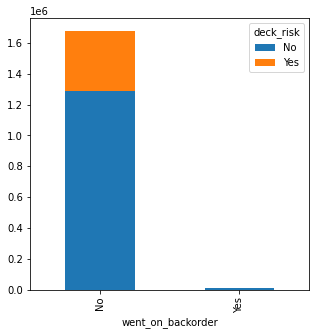

In [ ]:
deck_riskpl = pd.crosstab(index=train_df["went_on_backorder"], 
                          columns=train_df["deck_risk"])
print(deck_riskpl)
deck_riskpl.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

oe_constraint           No  Yes
went_on_backorder              
No                 1676330  237
Yes                  11285    8


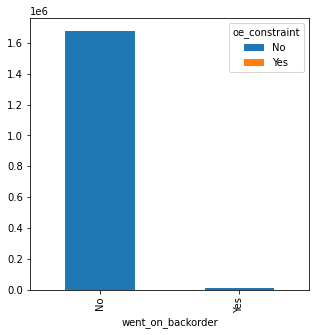

In [ ]:
oe_constraintpl = pd.crosstab(index=train_df["went_on_backorder"], 
                          columns=train_df["oe_constraint"])
print(oe_constraintpl)
oe_constraintpl.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

ppap_risk               No     Yes
went_on_backorder                 
No                 1474492  202075
Yes                   9534    1759


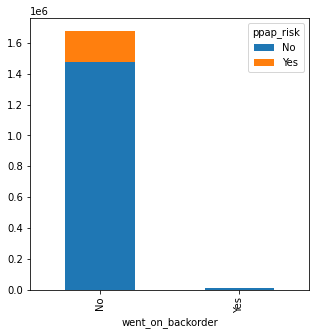

In [ ]:
ppap_riskpl = pd.crosstab(index=train_df["went_on_backorder"], 
                          columns=train_df["ppap_risk"])
print(ppap_riskpl)
ppap_riskpl.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

stop_auto_buy         No      Yes
went_on_backorder                
No                 60615  1615952
Yes                  471    10822


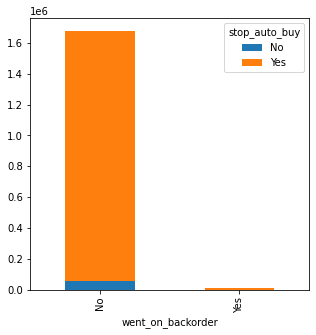

In [ ]:
stop_auto_buypl = pd.crosstab(index=train_df["went_on_backorder"], 
                          columns=train_df["stop_auto_buy"])
print(stop_auto_buypl)
stop_auto_buypl.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

rev_stop                No  Yes
went_on_backorder              
No                 1675836  731
Yes                  11293    0


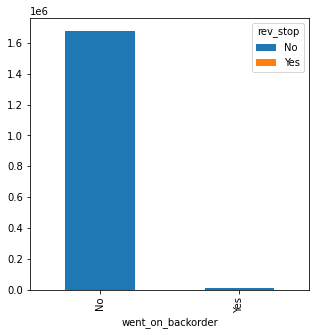

In [ ]:
rev_stoppl = pd.crosstab(index=train_df["went_on_backorder"], 
                          columns=train_df["rev_stop"])
print(rev_stoppl)
rev_stoppl.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

>><font color="Green">-If potential_issue feature is 'yes' then there is more chance of product going to back order<br>
-If oe_cosntraint feature is  'Yes' then there is more chance of product going to backorder.<br>
-if rev_stop feature is set to Yes, no chance of product being going into backorder.<br>
-Rest of the categories didnot showed much of effect.</font>


## DATA PREPROCESSING

>### Dropping the Primary key SKU

In [6]:
train_df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [7]:
train_df.drop('sku',axis='columns', inplace=True)

In [8]:
train_df.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [9]:
test_df.drop('sku',axis='columns', inplace=True)

>>#### <font color="Green">Sku column removed</font>

>### Replacing Nan values with 0

In [10]:
train_df.lead_time

0          NaN
1          9.0
2          NaN
3          8.0
4          NaN
          ... 
1687856    NaN
1687857    9.0
1687858    9.0
1687859    4.0
1687860    NaN
Name: lead_time, Length: 1687861, dtype: float64

In [11]:
train_df['lead_time'] = train_df['lead_time'].fillna(0)#replacing nan value  with 0

In [12]:
test_df['lead_time'] = test_df['lead_time'].fillna(0)

In [13]:
train_df.lead_time

0          0.0
1          9.0
2          0.0
3          8.0
4          0.0
          ... 
1687856    0.0
1687857    9.0
1687858    9.0
1687859    4.0
1687860    0.0
Name: lead_time, Length: 1687861, dtype: float64

>### Removing the Nan values from the last row

In [14]:
len(train_df)

1687861

In [15]:
train_df.drop(train_df.tail(1).index,inplace=True)


In [16]:
test_df.drop(test_df.tail(1).index,inplace=True)

>>#### <font color="Green">From the previous step of removing rows consisting null value in lead_time has removed the last row itself</font>


>### Replacing negative value from perf_6_month_avg and perf_12_month_avg to 0

In [17]:
train_df['perf_6_month_avg']=train_df['perf_6_month_avg'].replace(-99, 0)#replaceing -99 with 0
train_df['perf_12_month_avg']=train_df['perf_12_month_avg'].replace(-99, 0)

In [18]:
test_df['perf_6_month_avg']=test_df['perf_6_month_avg'].replace(-99, 0)#replaceing -99 with 0
test_df['perf_12_month_avg']=test_df['perf_12_month_avg'].replace(-99, 0)

## Feature Engineering

>### Encoding of Categorical features

In [19]:
conCatrain_df = train_df.replace(to_replace =["Yes", "No"], value =[1,0])
conCatrain_df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00,0.00,0.0,0,0,0,1,0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00,0.00,0.0,1,0,0,1,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,0.00,0.00,0.0,1,0,0,1,0,0


In [20]:
conCatest_df = test_df.replace(to_replace =["Yes", "No"], value =[1,0])
conCatest_df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.00,0.00,0.0,1,0,0,1,0,0
1,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.00,0.00,0.0,0,0,1,0,0,0
2,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.92,0.95,0.0,0,0,0,1,0,0
3,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,0.0,0.78,0.75,0.0,0,0,1,1,0,0
4,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.54,0.71,0.0,0,0,0,1,0,0


>>#### <font color="Green">All categorical features had yes and No as categories which we changed to 1 and 0 respectively</font> 

>### Normalisation of Numerical data

>#### There are some missing values in  perf_6_month_avg and perf_12_month_avg columns, we will replace that with mean value of the column

In [21]:
pm_6avg_mean = np.round(np.median(conCatrain_df. perf_6_month_avg.values),1)
conCatrain_df["perf_6_month_avg"].fillna(pm_6avg_mean, inplace = True)
conCatest_df["perf_6_month_avg"].fillna(pm_6avg_mean, inplace = True)

In [22]:
pm_6avg_mean

0.8

In [23]:
pm_12avg_mean = np.round(np.median(conCatrain_df. perf_12_month_avg.values),1)
conCatrain_df["perf_12_month_avg"].fillna(pm_12avg_mean, inplace = True)
conCatest_df["perf_12_month_avg"].fillna(pm_12avg_mean, inplace = True)

In [24]:
pm_12avg_mean

0.8

>>#### <font color="Green">Replaced the nan values with median value i.e 0.8, we cannot thake mean as it is affected by outlier</font>

In [25]:
data_df = pd.concat([conCatrain_df,conCatest_df])
y = data_df['went_on_backorder'].values
X = data_df.drop('went_on_backorder', axis=1)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [27]:
len(X_train),len(y_train)

(1543948, 1543948)

In [28]:
X_train_need = X_train.values[:,:14] #only numerical feature
X_test_need = X_test.values[:,:14]



In [29]:
#Reference:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html
from sklearn.preprocessing import MinMaxScaler
def normalisation_(train,test):
    minmaxing = MinMaxScaler()
    normTrain=train
    normTest=test
    
    minmaxing.fit(normTrain)
    train_normalised = minmaxing.transform(normTrain)
    test_normalised = minmaxing.transform(normTest)
    return train_normalised,test_normalised

In [30]:
train_Norm_df,test_Norm_df = normalisation_(X_train_need,X_test_need)

In [31]:
train_Norm_df.shape,test_Norm_df.shape

((1543948, 14), (385987, 14))

In [32]:
X_train_cat = X_train.values[:,14:]
X_test_cat = X_test.values[:,14:]


>>#### <font color="Green">By calling Minmaxer() function, we are normalising the numerical features.</font>

In [33]:
X_train_stack = np.hstack([X_train_need,X_train_cat])
X_test_stack = np.hstack([X_test_need,X_test_cat])


In [34]:
def batch_predict(clf,data):
    y_data_pred=[]
    tr_loop=data.shape[0]-data.shape[0]%10000
    for i in range(0,tr_loop,10000):
        y_data_pred.extend(clf.predict_proba(data[i:i+10000])[:,1])
        
    if data.shape[0]%10000!=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [35]:
def best_threshold(thresh,fpr,tpr):
    t=thresh[np.argmax(tpr*(1-fpr))]
    
    #print("the maximum value of tpr*(1-fpr)",max(tpr*(1-fpr)),"for threshold",np.round(t,3))
    return t

def prediction_(proba,thresh):
    #print("theshold",threshold)
    predictions=[]
    for i in proba:
        if i>=thresh:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [36]:
def plot_roc_auc_(classifier,train,test,y_train,y_test):
    %pylab inline
    classifier.fit(train,y_train)
    y_train_predict=batch_predict(classifier,train)
    y_test_predict=batch_predict(classifier,test)
    train_fpr,train_tpr,train_threshold=roc_curve(y_train,y_train_predict)
    test_fpr,test_tpr,test_threshold=roc_curve(y_test,y_test_predict)
    plt.plot(train_fpr,train_tpr,label='Train ROC Curve')
    plt.plot(test_fpr,test_tpr,label='Test ROC Curve')
    plt.legend()
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('TPR vs FPR graph')
    plt.grid()
    plt.show()

    train_auc = auc(train_fpr,train_tpr)
    test_auc = auc(test_fpr,test_tpr)
    print("Train AUC Score",train_auc)
    print("Test AUC Score",test_auc)
    
    fig=plt.figure()
    ax=fig.add_subplot(111)
    best_t= best_threshold(train_threshold,train_fpr,train_tpr)
    print("Train Confusion Matrix")
    y_train_predicti=prediction_(y_train_predict,best_t)
    train_matrix=confusion_matrix(y_train,y_train_predicti)
    sns.heatmap(train_matrix,annot=True,fmt='d')
    plt.show(ax)
    print()
    fig=plt.figure()
    ax1=fig.add_subplot(111)
    print("Test Cofusion Matrix")
    y_test_predicti=prediction_(y_test_predict,best_t)
    test_matrix=confusion_matrix(y_test,y_test_predicti)
    sns.heatmap(test_matrix,annot=True,fmt='d')
    plt.show(ax1)
    return train_auc,test_auc




In [41]:
def plot_feature_importance(importance_func,names,model_type):
    
    #Create arrays from feature importance and feature names
    %pylab inline
    feature_importance = np.array(importance_func)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
   
    plt.figure(figsize=(10,8))
   
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
    plt.title( 'FEATURE IMPORTANCE '+model_type)
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

## Baseline Model

In [ ]:
strategy = ['stratified', 'most_frequent', 'prior', 'uniform']
cv_auc = []

for s in tq.tqdm(strategy):
    dummy_clf = DummyClassifier(strategy=s)
    cal_clf= CalibratedClassifierCV(dummy_clf, method="sigmoid")
    cal_clf.fit(X_train_stack,y_train)
    y_predict = cal_clf.predict_proba(X_cv_stack)
    cv_auc.append(roc_auc_score(y_cv,y_predict[:,1]))
    #f1_scoreD.append(f1_score(y_cv,y_predict))
    

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.60s/it]


In [ ]:
cv_auc

[0.5009835917415146, 0.5, 0.5, 0.5]

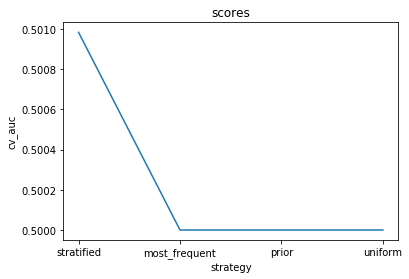

In [ ]:

plt.plot(strategy,cv_auc)
  

plt.xlabel('strategy')

plt.ylabel('cv_auc')
  

plt.title('scores')

plt.show()

## Naive Bayes Classification 

In [ ]:

NB = GaussianNB()
parameters = {'var_smoothing':[0.00001,0.0002, 0.0001, 0.001, 0.01, 0.1,0.2,0.5]}

clf = GridSearchCV(NB, parameters, cv=10, verbose=1,return_train_score=True,n_jobs=4)
clf.fit(X_train_stack,y_train)

bestparam=clf.best_params_['var_smoothing']
bestScore=clf.best_score_

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:  3.7min finished


In [ ]:
bestparam,bestScore

(0.1, 0.9927601188707703)

In [47]:
NB_f = GaussianNB(var_smoothing=0.1)

clf1 = CalibratedClassifierCV(NB_f, method="sigmoid")
clf1.fit(X_train_stack,y_train)


CalibratedClassifierCV(base_estimator=GaussianNB(priors=None,
                                                 var_smoothing=0.1),
                       cv=None, method='sigmoid')

**AUC Score, ROC curve and confusion matrix of Naive Bayes Model**

Populating the interactive namespace from numpy and matplotlib


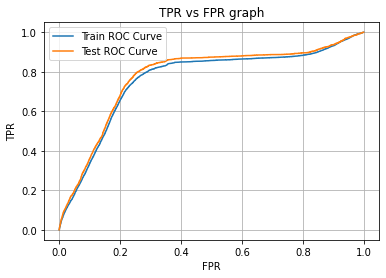

Train AUC Score 0.7590919773294433
Test AUC Score 0.7757247781835782
Train Confusion Matrix


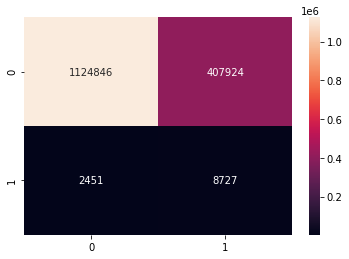


Test Cofusion Matrix


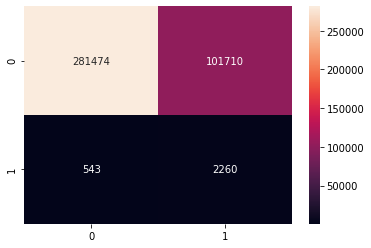

In [49]:
import matplotlib.pyplot as plt 
NB_trainAUC,NB_testAUC=plot_roc_auc_(clf1,X_train_stack,X_test_stack,y_train,y_test)

#### F1 score by Naive Bayes

In [48]:
f1_score_NB_Train = f1_score(y_train, clf1.predict(X_train_stack), average='micro')
f1_score_NB_Test = f1_score(y_test, clf1.predict(X_test_stack), average='micro')
print("Train F1-Score:",f1_score_NB_Train)
print("Test F1-Score:",f1_score_NB_Test)

Train F1-Score: 0.9927601188641069
Test F1-Score: 0.9927380973970626


## KNN

In [ ]:

KN = KNeighborsClassifier()
params = {'n_neighbors':[k for k in range(1,23,2)]}
clf1= GridSearchCV(KN, params, cv= 3,verbose=1,return_train_score=True,n_jobs=4)
clf1.fit(X_train_stack,y_train)
bestparam1=clf1.best_params_['n_neighbors']
bestScore1=clf1.best_score_

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 out of  33 | elapsed: 723.5min finished


In [ ]:
bestparam1, bestScore1

(15, 0.9927827880360347)

In [39]:
%%time
KN_f = KNeighborsClassifier(n_neighbors=15)
clf2 = CalibratedClassifierCV(KN_f, method="sigmoid")
clf2.fit(X_train_stack,y_train)


CPU times: user 1h 1min 23s, sys: 11.6 s, total: 1h 1min 34s
Wall time: 1h 1min 16s


**AUC Score, ROC curve and confusion matrix of KNN Model**

Populating the interactive namespace from numpy and matplotlib


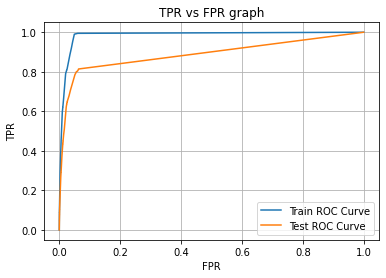

Train AUC Score 0.9846780766918857
Test AUC Score 0.8885418106523992
Train Confusion Matrix


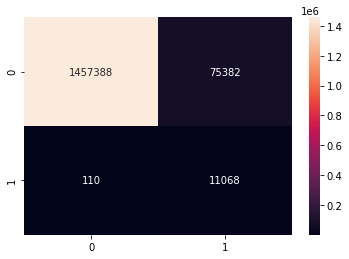


Test Cofusion Matrix


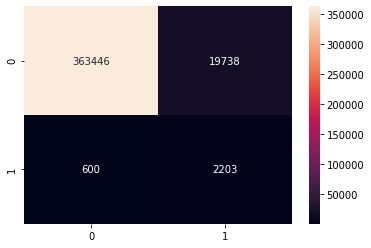

In [40]:
KNN_trainAUC,KNN_testAUC = plot_roc_auc_(clf2,X_train_stack,X_test_stack,y_train,y_test)

#### F1 score by KNN

In [41]:
f1_score_KNN_train = f1_score(y_train, clf2.predict(X_train_stack), average='micro')
f1_score_KNN_test = f1_score(y_test, clf2.predict(X_test_stack), average='micro')

print("Train F1-Score:",f1_score_KNN_train)
print("Test F1-Score:",f1_score_KNN_test)

Train F1-Score: 0.9930042980722149
Test F1-Score: 0.9925178827266203


## **LOGISTIC REGRESSION**

In [ ]:
lambda_values = {"C":[10 ** lam for lam in range(-5,4)]}

lr = LogisticRegression(penalty='l2')
clf_log = GridSearchCV(lr, lambda_values, cv= 10,verbose=1,return_train_score=True,n_jobs=4)
clf_log.fit(X_train_stack, y_train)
 

In [ ]:
bestparam2 = clf_log.best_params_['C']
bestScore2 = clf_log.best_score_ 

In [ ]:
bestparam2 , bestScore2

(0.1, 0.9925807087437878)

In [ ]:
log_f = LogisticRegression(penalty='l2',C=0.1)
clf3 = CalibratedClassifierCV(log_f, method="sigmoid")
clf3.fit(X_train_stack,y_train)


CalibratedClassifierCV(base_estimator=LogisticRegression(C=0.1,
                                                         class_weight=None,
                                                         dual=False,
                                                         fit_intercept=True,
                                                         intercept_scaling=1,
                                                         l1_ratio=None,
                                                         max_iter=100,
                                                         multi_class='auto',
                                                         n_jobs=None,
                                                         penalty='l2',
                                                         random_state=None,
                                                         solver='lbfgs',
                                                         tol=0.0001, verbose=0,
                                              

**AUC Score, ROC curve and confusion matrix of Logistic Model**

Populating the interactive namespace from numpy and matplotlib


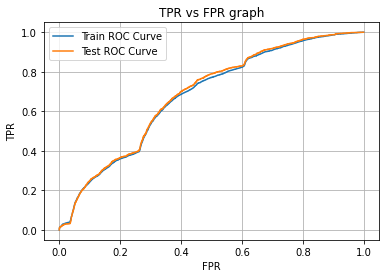

Train AUC Score 0.6771517242980467
Test AUC Score 0.6838817418896175
Train Confusion Matrix


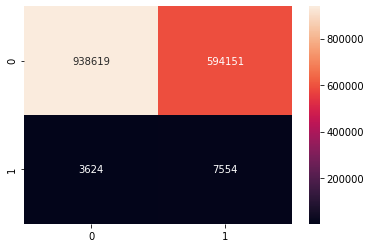


Test Cofusion Matrix


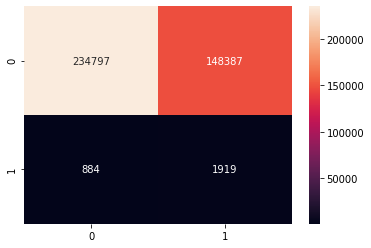

In [ ]:
log_trainAUC,log_testAUC = plot_roc_auc_(clf3,X_train_stack,X_test_stack,y_train,y_test)

#### F1 score by Logistic Regression

In [ ]:
f1_score_Log_train = f1_score(y_train, clf3.predict(X_train_stack), average='micro')
f1_score_Log_test = f1_score(y_test, clf3.predict(X_test_stack), average='micro')
print("Train F1-Score:",f1_score_Log_train)
print("Test F1-Score:",f1_score_Log_test )

Train F1-Score: 0.9927601188641069
Test F1-Score: 0.9927380973970626


## SVM

In [ ]:
svc_f = LinearSVC(random_state=42,C=0.01)
clf_sv = CalibratedClassifierCV(svc_f, method="sigmoid")
clf_sv.fit(X_train_stack,y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(C=0.01, class_weight=None,
                                                dual=True, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=1000,
                                                multi_class='ovr', penalty='l2',
                                                random_state=42, tol=0.0001,
                                                verbose=0),
                       cv=None, method='sigmoid')

In [ ]:
clf6.best_params_['C']

0.01

In [ ]:

svmm = LinearSVC()

params_svc = {'C': [0.0001, 0.001, 0.01, 0.1,0.2,0.5]}
clf6 = GridSearchCV(svmm, param_grid=params_svc,cv=3, n_jobs=4)
#learning
clf6.fit(X_train_stack,y_train)


**AUC Score, ROC curve and confusion matrix of SVM Model**

Populating the interactive namespace from numpy and matplotlib


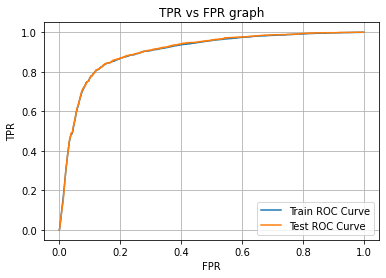

Train AUC Score 0.9014358222646183
Test AUC Score 0.9033895718979893
Train Confusion Matrix


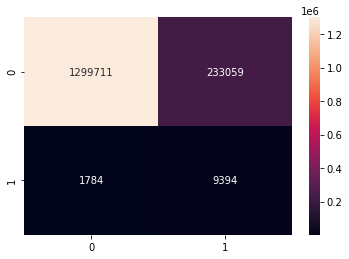


Test Cofusion Matrix


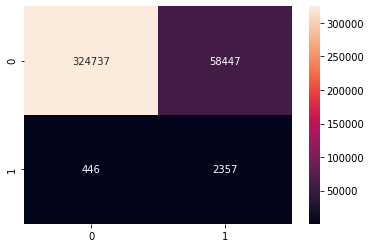

In [ ]:
sv_trainAUC,sv_testAUC = plot_roc_auc_(clf_sv,X_train_stack,X_test_stack,y_train,y_test)

**F1 Score of SVM**

In [ ]:
f1_score_sv_train = f1_score(y_train, clf_sv.predict(X_train_stack), average='micro')
f1_score_sv_test = f1_score(y_test, clf_sv.predict(X_test_stack), average='micro')
print("Train F1-Score:",f1_score_sv_train)
print("Test F1-Score:",f1_score_sv_test)

Train F1-Score: 0.992753641962035
Test F1-Score: 0.992725143592919


### DECISION TREE

In [ ]:

params_dt={'max_depth': [1,5,10,50],
'min_samples_split': [5,10,100,500]}
DT = DecisionTreeClassifier()
clf_DT = GridSearchCV(DT, params_dt, cv= 3,verbose=1,n_jobs=4)
clf_DT.fit(X_train_stack, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:  3.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=4,
             param_grid={'max_depth': [1, 5, 10, 50],
                         'm

In [ ]:
clf_DT.best_params_['max_depth'],clf_DT.best_params_['min_samples_split']

(1, 5)

In [ ]:
DT_f = DecisionTreeClassifier(max_depth=1 ,min_samples_split=5,random_state=42)
clf_D = CalibratedClassifierCV(DT_f, method="sigmoid")
clf_D.fit(X_train_stack,y_train)

CalibratedClassifierCV(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=1,
                                                             max_features=None,
                                                             max_leaf_nodes=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=5,
                                                             min_weight_fraction_leaf=0.0,
                                                             presort='deprecated',
                  

**AUC Score, ROC curve and confusion matrix of Decision Tree Model**

Populating the interactive namespace from numpy and matplotlib


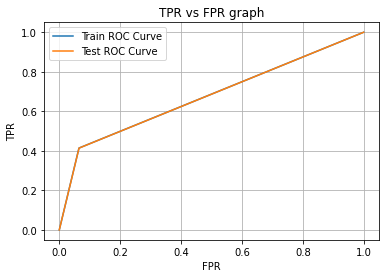

Train AUC Score 0.6747369592142147
Test AUC Score 0.6744837368054697
Train Confusion Matrix


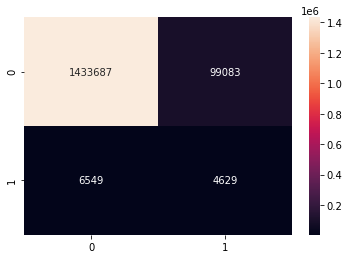


Test Cofusion Matrix


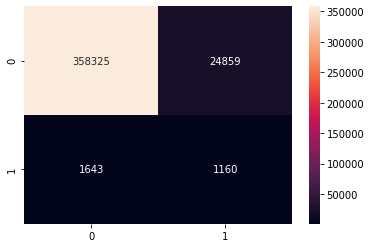

In [ ]:
DT_trainAUC,DT_testAUC = plot_roc_auc_(clf_D,X_train_stack,X_test_stack,y_train,y_test)

**F1 Score of Decision Tree**

In [ ]:
f1_score_DT_train = f1_score(y_train, clf_D.predict(X_train_stack), average='micro')
f1_score_DT_test = f1_score(y_test, clf_D.predict(X_test_stack), average='micro')
print("Train F1-Score:",f1_score_DT_train)
print("Test F1-Score:",f1_score_DT_test)

Train F1-Score: 0.9927601188641069
Test F1-Score: 0.9927380973970626


**Feature Importance from Decision Tree**

In [39]:

DT_f = DecisionTreeClassifier(max_depth=1 ,min_samples_split=5,random_state=42)

DT_f.fit(X_train_stack,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Populating the interactive namespace from numpy and matplotlib


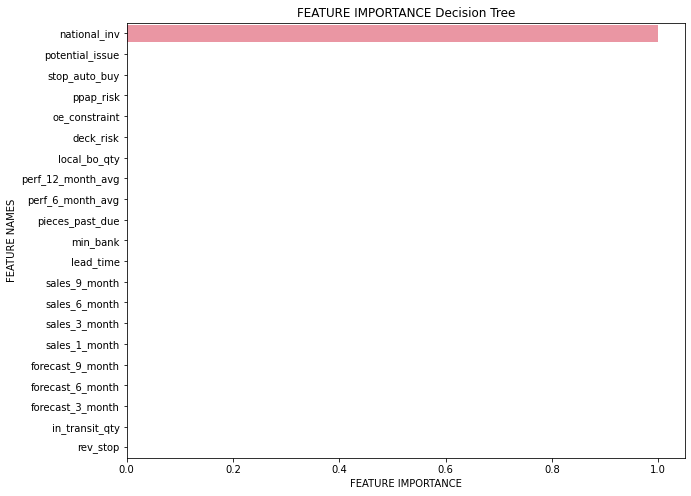

In [42]:
plot_feature_importance(DT_f.feature_importances_,X.columns,'Decision Tree')

## **RANDOM FOREST**

In [ ]:

RF=RandomForestClassifier()
params_RF = {'n_estimators':[10,15,20,25,30,50],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7]}
clf4 = GridSearchCV(RF, param_grid=params_RF,cv=3, n_jobs=4)
#learning
clf4.fit(X_train_stack,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [10, 15, 20, 25, 30, 50]})

In [ ]:
clf4.best_params_['n_estimators'],clf4.best_params_['min_samples_leaf'],clf4.best_params_['min_samples_split']

(50, 1, 3)

In [ ]:
RF_f = RandomForestClassifier(n_estimators=50 ,min_samples_leaf=1,min_samples_split=3,random_state=42,n_jobs=4)
clf_RF = CalibratedClassifierCV(RF_f, method="sigmoid")
clf_RF.fit(X_train_stack,y_train)


CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=3,
                               

**AUC Score, ROC curve and confusion matrix of Random Forest Model**

Populating the interactive namespace from numpy and matplotlib


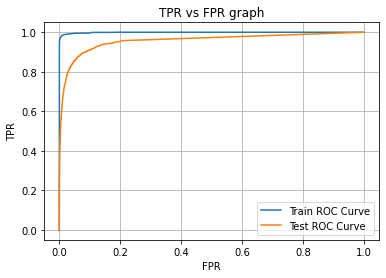

Train AUC Score 0.9990255055641326
Test AUC Score 0.9575275206498909
Train Confusion Matrix


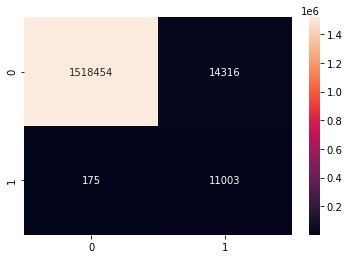


Test Cofusion Matrix


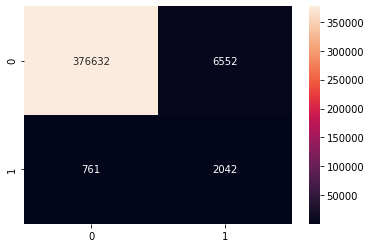

In [ ]:
RF_trainAUC,RF_testAUC = plot_roc_auc_(clf_RF,X_train_stack,X_test_stack,y_train,y_test)

**F1 Score by Random Forest**

In [ ]:
f1_score_RF_train = f1_score(y_train, clf_RF.predict(X_train_stack), average='micro')
f1_score_RF_test = f1_score(y_test, clf_RF.predict(X_test_stack), average='micro')
print("Train F1-Score:",f1_score_RF_train)
print("Test F1-Score:",f1_score_RF_test)

Train F1-Score: 0.9993238114237007
Test F1-Score: 0.994100837592976


**Feature Importance of Random Forest**

In [ ]:
RF_f = RandomForestClassifier(n_estimators=50 ,min_samples_leaf=1,min_samples_split=3,random_state=42,n_jobs=4)

RF_f.fit(X_train_stack,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

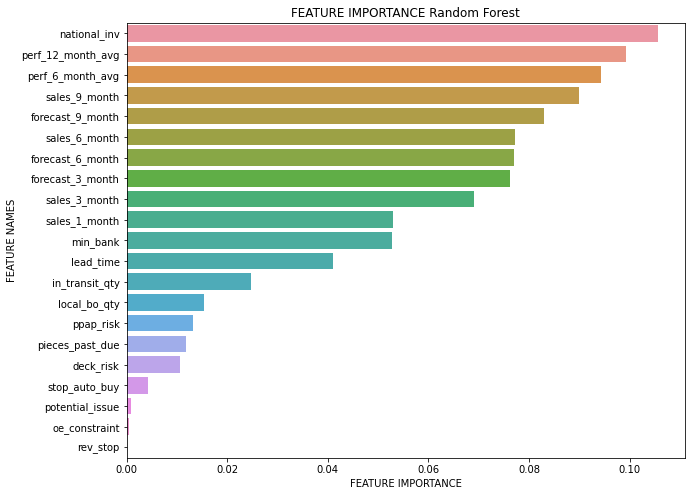

In [ ]:
plot_feature_importance(RF_f.feature_importances_,X.columns,'Random Forest')

## **XGBOOST Classifier**

In [ ]:

XGB = XGBClassifier()

params_XGB = {'n_estimators': [10,15,20,25,30,50],
              'learning_rate': [0.01,0.1,0.2,1],
              'max_depth': [1,2,3]}
clf5 = GridSearchCV(XGB, param_grid=params_XGB,cv=3, n_jobs=4)
#learning
clf5.fit(X_train_stack,y_train)

In [ ]:
clf5.best_params_['n_estimators'],clf5.best_params_['learning_rate'],clf5.best_params_['max_depth']

(10, 0.01, 1)

In [ ]:
XGB_f = XGBClassifier(n_estimators=10 ,learning_rate=0.01,max_depth=1,random_state=42,n_jobs=4)
clf_XG = CalibratedClassifierCV(XGB_f , method="sigmoid")
clf_XG.fit(X_train_stack,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=4,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

**AUC Score, ROC curve and confusion matrix of XGBoost Classifier Model**

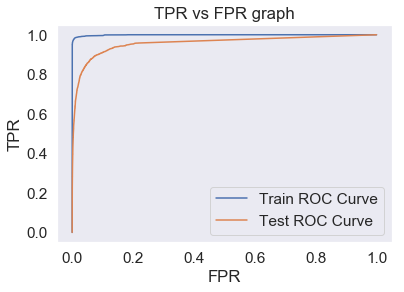

Train AUC Score 0.9990253801067124
Test AUC Score 0.9575280518096733
Train Confusion Matrix


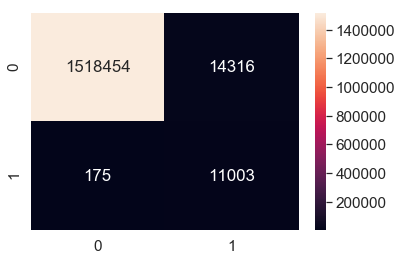


Test Cofusion Matrix


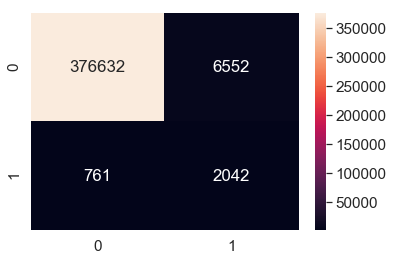

In [ ]:
XG_trainAUC,XG_testAUC = plot_roc_auc_(clf_XG,X_train_stack,X_test_stack,y_train,y_test)

#### F1 score of XGBoost Classifier

In [ ]:
f1_score_XG_train = f1_score(y_train, clf_XG.predict(X_train_stack), average='macro')
f1_score_XG_test = f1_score(y_test, clf_XG.predict(X_test_stack), average='macro')
print("Train F1-Score:",f1_score_XG_train)
print("Test F1-Score:",f1_score_XG_test)

Train F1-Score: 0.9760332444697394
Test F1-Score: 0.7158008132874518


#### Feature Importance of XGboost Classifier

In [ ]:
XGB_f = XGBClassifier(n_estimators=10 ,learning_rate=0.01,max_depth=1,random_state=42,n_jobs=4)

XGB_f.fit(X_train_stack,y_train)

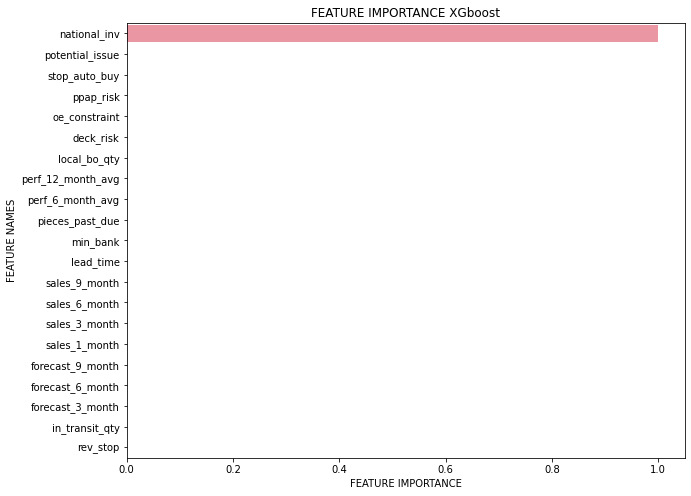

In [ ]:

plot_feature_importance(XGB_f.feature_importances_,X.columns,'XGboost')

### CATBOOST Classifier

In [ ]:

CB = CatBoostClassifier()

params_cat = {'learning_rate': [0.001,0.01,0.1, 1]}
clf7 = GridSearchCV(CB, param_grid=params_cat,cv=3, n_jobs=4)
#learning
clf7.fit(X_train_stack,y_train)



0:	learn: 0.4723587	total: 482ms	remaining: 8m 1s
1:	learn: 0.3263572	total: 929ms	remaining: 7m 43s
2:	learn: 0.2307886	total: 1.36s	remaining: 7m 31s
3:	learn: 0.1591147	total: 1.78s	remaining: 7m 24s
4:	learn: 0.1141436	total: 2.21s	remaining: 7m 18s
5:	learn: 0.0858429	total: 2.66s	remaining: 7m 20s
6:	learn: 0.0683349	total: 3.09s	remaining: 7m 18s
7:	learn: 0.0571836	total: 3.52s	remaining: 7m 17s
8:	learn: 0.0495896	total: 3.98s	remaining: 7m 18s
9:	learn: 0.0444799	total: 4.41s	remaining: 7m 16s
10:	learn: 0.0408886	total: 4.84s	remaining: 7m 15s
11:	learn: 0.0380608	total: 5.27s	remaining: 7m 13s
12:	learn: 0.0359551	total: 5.71s	remaining: 7m 13s
13:	learn: 0.0344928	total: 6.15s	remaining: 7m 13s
14:	learn: 0.0332743	total: 6.59s	remaining: 7m 12s
15:	learn: 0.0324699	total: 6.98s	remaining: 7m 9s
16:	learn: 0.0318659	total: 7.41s	remaining: 7m 8s
17:	learn: 0.0313500	total: 7.84s	remaining: 7m 7s
18:	learn: 0.0309834	total: 8.26s	remaining: 7m 6s
19:	learn: 0.0307772	total:

GridSearchCV(cv=3, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f8e71e79910>,
             iid='deprecated', n_jobs=4,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf7.best_params_['learning_rate']

0.1

In [ ]:
CB_f = CatBoostClassifier(random_state=42,learning_rate=0.1)
clf_CB = CalibratedClassifierCV(CB_f, method="sigmoid")
clf_CB.fit(X_train_stack,y_train)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.4792129	total: 352ms	remaining: 5m 51s
1:	learn: 0.3232219	total: 737ms	remaining: 6m 7s
2:	learn: 0.2127212	total: 1.09s	remaining: 6m
3:	learn: 0.1566065	total: 1.43s	remaining: 5m 55s
4:	learn: 0.1193559	total: 1.77s	remaining: 5m 52s
5:	learn: 0.0948683	total: 2.12s	remaining: 5m 50s
6:	learn: 0.0749257	total: 2.47s	remaining: 5m 50s
7:	learn: 0.0609925	total: 2.84s	remaining: 5m 52s
8:	learn: 0.0524518	total: 3.2s	remaining: 5m 52s
9:	learn: 0.0462256	total: 3.53s	remaining: 5m 49s
10:	learn: 0.0419399	total: 3.88s	remaining: 5m 48s
11:	learn: 0.0390920	total: 4.22s	remaining: 5m 47s
12:	learn: 0.0368961	total: 4.58s	remaining: 5m 47s
13:	learn: 0.0356803	total: 4.91s	remaining: 5m 46s
14:	learn: 0.0349527	total: 5.24s	remaining: 5m 44s
15:	learn: 0.0343399	total: 5.58s	remaining: 5m 43s
16:	learn: 0.0332119	total: 5.95s	remaining: 5m 43s
17:	learn: 0.0326635	total: 6.29s	remaining: 5m 43s
18:	learn: 0.0319001	total: 6

CalibratedClassifierCV(base_estimator=<catboost.core.CatBoostClassifier object at 0x7f12d8fb1c10>,
                       cv=None, method='sigmoid')

#### AUC Score, ROC curve and confusion matrix of CATBoost Classifier Model

Streaming output truncated to the last 5000 lines.
0:	learn: 0.4792129	total: 327ms	remaining: 5m 27s
1:	learn: 0.3232219	total: 671ms	remaining: 5m 35s
2:	learn: 0.2127212	total: 1.02s	remaining: 5m 37s
3:	learn: 0.1566065	total: 1.35s	remaining: 5m 37s
4:	learn: 0.1193559	total: 1.69s	remaining: 5m 36s
5:	learn: 0.0948683	total: 2.02s	remaining: 5m 35s
6:	learn: 0.0749257	total: 2.37s	remaining: 5m 36s
7:	learn: 0.0609925	total: 2.73s	remaining: 5m 38s
8:	learn: 0.0524518	total: 3.08s	remaining: 5m 38s
9:	learn: 0.0462256	total: 3.41s	remaining: 5m 37s
10:	learn: 0.0419399	total: 3.75s	remaining: 5m 36s
11:	learn: 0.0390920	total: 4.08s	remaining: 5m 36s
12:	learn: 0.0368961	total: 4.43s	remaining: 5m 36s
13:	learn: 0.0356803	total: 4.76s	remaining: 5m 35s
14:	learn: 0.0349527	total: 5.09s	remaining: 5m 34s
15:	learn: 0.0343399	total: 5.42s	remaining: 5m 33s
16:	learn: 0.0332119	total: 5.75s	remaining: 5m 32s
17:	learn: 0.0326635	total: 6.08s	remaining: 5m 31s
18:	learn: 0.0319001	to

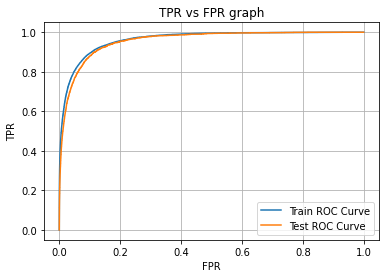

Train AUC Score 0.9630614764833327
Test AUC Score 0.9567676488651775
Train Confusion Matrix


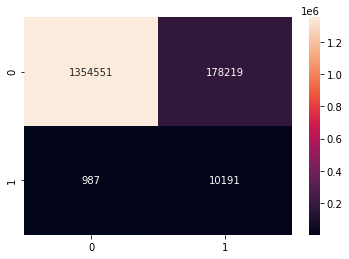


Test Cofusion Matrix


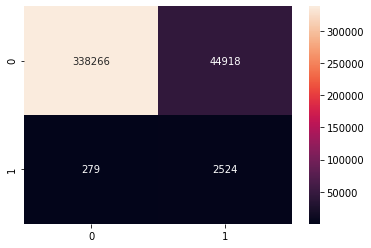

In [ ]:
CB_trainAUC,CB_testAUC = plot_roc_auc_(clf_CB,X_train_stack,X_test_stack,y_train,y_test)

In [ ]:
f1_score_CB_train = f1_score(y_train, clf_CB.predict(X_train_stack), average='micro')
f1_score_CB_test = f1_score(y_test, clf_CB.predict(X_test_stack), average='micro')
print("Train F1-Score:",f1_score_CB_train)
print("Test F1-Score:",f1_score_CB_test)

Train F1-Score: 0.9940069225129343
Test F1-Score: 0.993121529999715


#### Feature Importance of CATboost classifier

In [ ]:
CB_f = CatBoostClassifier(random_state=42,learning_rate=0.1)

CB_f.fit(X_train_stack,y_train)

0:	learn: 0.4792946	total: 490ms	remaining: 8m 9s
1:	learn: 0.3231145	total: 922ms	remaining: 7m 39s
2:	learn: 0.2124704	total: 1.36s	remaining: 7m 32s
3:	learn: 0.1564814	total: 1.77s	remaining: 7m 21s
4:	learn: 0.1192588	total: 2.23s	remaining: 7m 24s
5:	learn: 0.0948119	total: 2.66s	remaining: 7m 20s
6:	learn: 0.0742795	total: 3.08s	remaining: 7m 16s
7:	learn: 0.0625832	total: 3.5s	remaining: 7m 14s
8:	learn: 0.0533148	total: 3.94s	remaining: 7m 14s
9:	learn: 0.0467913	total: 4.34s	remaining: 7m 10s
10:	learn: 0.0423792	total: 4.81s	remaining: 7m 12s
11:	learn: 0.0397212	total: 5.24s	remaining: 7m 11s
12:	learn: 0.0377102	total: 5.65s	remaining: 7m 8s
13:	learn: 0.0365841	total: 6.08s	remaining: 7m 7s
14:	learn: 0.0349172	total: 6.5s	remaining: 7m 6s
15:	learn: 0.0343501	total: 6.91s	remaining: 7m 4s
16:	learn: 0.0333277	total: 7.33s	remaining: 7m 3s
17:	learn: 0.0323785	total: 7.75s	remaining: 7m 3s
18:	learn: 0.0317157	total: 8.18s	remaining: 7m 2s
19:	learn: 0.0311828	total: 8.61

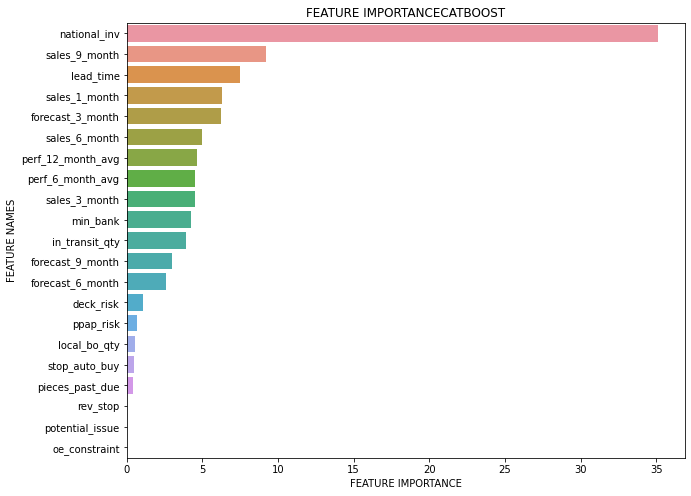

In [ ]:
plot_feature_importance(CB_f.get_feature_importance(),X.columns,'CATBOOST')

### LGBM Classifier

In [ ]:
LG= lgb.LGBMClassifier()
params_LG = {'learning_rate': [0.002,0.001,0.05,0.02,0.01,0.1,0.2,0.5]
}
clf8 = GridSearchCV(LG, param_grid=params_LG,cv=3, n_jobs=4)
clf8.fit(X_train_stack, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=4,
             param_grid={'learning_rate': [0.002, 0.001, 0.05, 0.02, 0.01, 0.1,
                 

In [ ]:
clf8.best_params_['learning_rate']

0.01

In [ ]:
LGB_f = lgb.LGBMClassifier(learning_rate=0.01,random_state=42)
clf_LG = CalibratedClassifierCV(LGB_f, method="sigmoid")
clf_LG.fit(X_train_stack, y_train)

CalibratedClassifierCV(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                     class_weight=None,
                                                     colsample_bytree=1.0,
                                                     importance_type='split',
                                                     learning_rate=0.01,
                                                     max_depth=-1,
                                                     min_child_samples=20,
                                                     min_child_weight=0.001,
                                                     min_split_gain=0.0,
                                                     n_estimators=100,
                                                     n_jobs=-1, num_leaves=31,
                                                     objective=None,
                                                     random_state=42,
                                              

#### AUC Score, ROC curve and confusion matrix of LGBM Classifier Model

Populating the interactive namespace from numpy and matplotlib


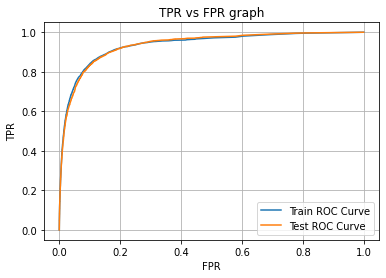

Train AUC Score 0.936102656495005
Test AUC Score 0.9364648342914805
Train Confusion Matrix


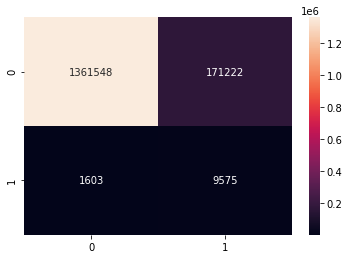


Test Cofusion Matrix


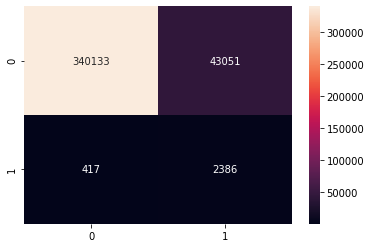

In [ ]:
LGB_trainAUC,LGB_testAUC = plot_roc_auc_(clf_LG,X_train_stack,X_test_stack,y_train,y_test)

In [ ]:
f1_score_LGB_train = f1_score(y_train, clf_LG.predict(X_train_stack), average='micro')
f1_score_LGB_test = f1_score(y_test, clf_LG.predict(X_test_stack), average='micro')
print("Train F1-Score:",f1_score_LGB_train)
print("Test F1-Score:",f1_score_LGB_test)

Train F1-Score: 0.5793813582339233
Test F1-Score: 0.5834536811213363


#### Feature Importance from LightLGBM Classifier

In [ ]:
LGB_f = lgb.LGBMClassifier(learning_rate=0.01,random_state=42)

LGB_f.fit(X_train_stack, y_train)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

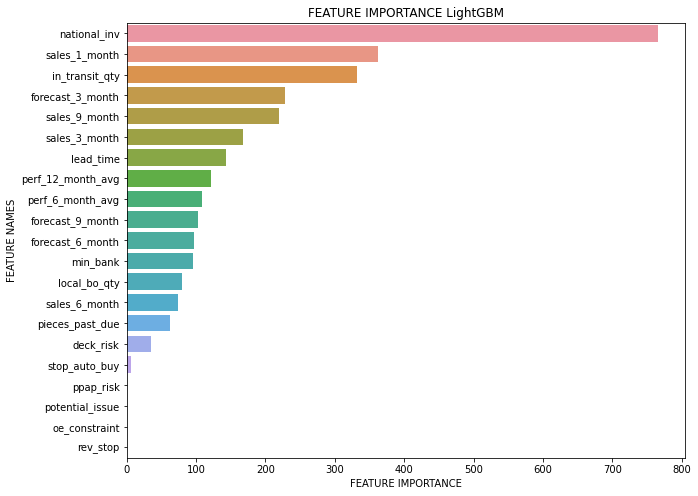

In [ ]:
plot_feature_importance(LGB_f.feature_importances_,X.columns,'LightGBM')

### **Model Performance**

In [45]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Model','AUC Train', 'AUC Test']),
                 cells=dict(values=[['Naive Bayes','KNN','Logistic Regression','SVM','Decsion Tree','Random Forest','XGboost','CATBoost','LightGBM'], 
                                    [NB_trainAUC, KNN_trainAUC, log_trainAUC,sv_trainAUC,dt_trainAUC, RF_trainAUC,XG_trainAUC,CB_trainAUC,LGB_trainAUC],
                                    [NB_testAUC, KNN_testAUC, log_testAUC,sv_testAUC,dt_testAUC, RF_testAUC,XG_testAUC,CB_testAUC,LGB_testAUC]]))

                     ])
fig.show()

In [44]:
fig = go.Figure(data=[go.Table(header=dict(values=['Model','F1 score Train', 'F1 score Test']),
                 cells=dict(values=[['Naive Bayes','KNN','Logistic Regression','SVM','Decsion Tree','Random Forest','XGboost','CATBoost','LightGBM'], [f1_score_NB_train, f1_score_KNN_train, f1_score_log_train,f1_score_sv_train,f1_score_DT_train, f1_score_RF_train,f1_score_XG_train,f1_score_CB_train,f1_score_LGB_train],
                                    [f1_score_NB_test, f1_score_KNN_test, f1_score_log_test,f1_score_sv_test,f1_score_DT_test, f1_score_RF_test,f1_score_XG_test,f1_score_CB_test,f1_score_LGB_test]]))

                     ]) 
fig.show()

<font color="blue"><b>Observation</b></font><br>
**<font color="green">Feature Importance</font>**<br>

-In Decision Tree and XGBoost feature importance, we can see that it shows National inventory feature to be the only important feature.

- In Random Forest, we can see that national inventory is the most important feature followed by performce 12 and 6 months and so on.

- In CatBoost and LGBM classifier also picks the national inventory to be the most important feature in order to predict backorders.

- oe_constraint and rev_stop feature showed no importance in any of the tree model<br><br>

<font color="green">**Model Performance**</font>

After performing HyperParameter tunning with gridsearch, we got best parameter and improved in the prediction
- In f1 score Random Forest and CATBoost classifier Performed best among all with scores of **99%**. though time taken by CATBoost was less.

- In AUC score, Random Forest, XGBoost classifier and CATBoost Classifier performed well among all with  test auc score of **95%**


<font color="blue">**References**</font>
- https://www.kaggle.com/dredlaw/predicting-backorders-with-3-models

- https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00345-2

- https://www.researchgate.net/publication/319553365_Predicting_Material_Backorders_in_Inventory_Management_using_Machine_Learning

- https://www.researchgate.net/publication/228084510_Combining_Bagging_and_Boosting

- https://sci-hub.se/10.1016/j.eswa.2015.12.032

- https://catboost.ai/docs/concepts/python-reference_catboost_get_feature_importance.html

-